In [1]:
from tensorflow.keras.datasets import imdb
from sklearn.model_selection import train_test_split

(train_input, train_target), (test_input, test_target) = imdb.load_data(num_words=500)
train_input, val_input, train_target, val_target = train_test_split(train_input, train_target, test_size=0.2, random_state=42)

17473536/17464789 [==============================] - 0s 0us/step


In [2]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
train_seq = pad_sequences(train_input, maxlen=100)
val_seq = pad_sequences(val_input, maxlen=100)

In [3]:
from tensorflow import keras
model = keras.Sequential()
model.add(keras.layers.Embedding(500, 16, input_length=100))
model.add(keras.layers.LSTM(8))
model.add(keras.layers.Dense(1, activation='sigmoid'))

In [4]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 16)           8000      
_________________________________________________________________
lstm (LSTM)                  (None, 8)                 800       
_________________________________________________________________
dense (Dense)                (None, 1)                 9         
Total params: 8,809
Trainable params: 8,809
Non-trainable params: 0
_________________________________________________________________


In [5]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model.compile(optimizer=rmsprop, loss='binary_crossentropy', 
              metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-lstm-model.h5', 
                                                save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,
                                                  restore_best_weights=True)

history = model.fit(train_seq, train_target, epochs=100, batch_size=64,
                    validation_data=(val_seq, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 14s 22ms/step - loss: 0.6928 - accuracy: 0.5405 - val_loss: 0.6924 - val_accuracy: 0.5528
Epoch 2/100
313/313 [==============================] - 6s 20ms/step - loss: 0.6913 - accuracy: 0.6080 - val_loss: 0.6905 - val_accuracy: 0.6108
Epoch 3/100
313/313 [==============================] - 6s 20ms/step - loss: 0.6880 - accuracy: 0.6421 - val_loss: 0.6856 - val_accuracy: 0.6446
Epoch 4/100
313/313 [==============================] - 6s 20ms/step - loss: 0.6786 - accuracy: 0.6704 - val_loss: 0.6696 - val_accuracy: 0.6886
Epoch 5/100
313/313 [==============================] - 6s 20ms/step - loss: 0.6357 - accuracy: 0.7067 - val_loss: 0.6096 - val_accuracy: 0.7052
Epoch 6/100
313/313 [==============================] - 6s 20ms/step - loss: 0.5911 - accuracy: 0.7215 - val_loss: 0.5820 - val_accuracy: 0.7276
Epoch 7/100
313/313 [==============================] - 6s 20ms/step - loss: 0.5642 - accuracy: 0.7444 - val_loss: 0.5584 - val_accuracy

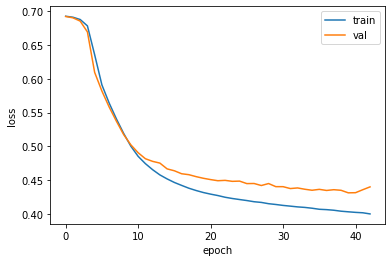

In [6]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

In [7]:
model2 = keras.Sequential()
model2.add(keras.layers.Embedding(500, 16, input_length=100))
model2.add(keras.layers.LSTM(8, dropout=0.3))
model2.add(keras.layers.Dense(1, activation='sigmoid'))

In [8]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model2.compile(optimizer=rmsprop, loss='binary_crossentropy',
               metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-dropout-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)

history = model2.fit(train_seq, train_target, epochs=100, batch_size=64,
                     validation_data=(val_seq, val_target),
                     callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 9s 22ms/step - loss: 0.6921 - accuracy: 0.5356 - val_loss: 0.6909 - val_accuracy: 0.5814
Epoch 2/100
313/313 [==============================] - 6s 20ms/step - loss: 0.6878 - accuracy: 0.6148 - val_loss: 0.6835 - val_accuracy: 0.6482
Epoch 3/100
313/313 [==============================] - 6s 20ms/step - loss: 0.6636 - accuracy: 0.6750 - val_loss: 0.6251 - val_accuracy: 0.7098
Epoch 4/100
313/313 [==============================] - 6s 20ms/step - loss: 0.6017 - accuracy: 0.7074 - val_loss: 0.5846 - val_accuracy: 0.7226
Epoch 5/100
313/313 [==============================] - 6s 20ms/step - loss: 0.5749 - accuracy: 0.7254 - val_loss: 0.5639 - val_accuracy: 0.7406
Epoch 6/100
313/313 [==============================] - 6s 20ms/step - loss: 0.5556 - accuracy: 0.7401 - val_loss: 0.5485 - val_accuracy: 0.7424
Epoch 7/100
313/313 [==============================] - 6s 20ms/step - loss: 0.5388 - accuracy: 0.7509 - val_loss: 0.5310 - val_accuracy:

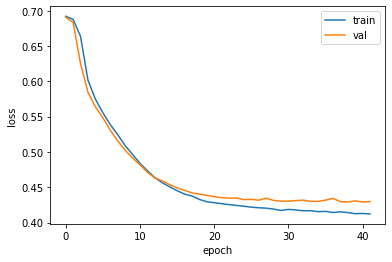

In [9]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

In [10]:
model3 = keras.Sequential()
model3.add(keras.layers.Embedding(500, 16, input_length=100))
model3.add(keras.layers.LSTM(8, dropout=0.3, return_sequences=True))
model3.add(keras.layers.LSTM(8))
model3.add(keras.layers.Dense(1, activation='sigmoid'))

In [11]:
model3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 100, 16)           8000      
_________________________________________________________________
lstm_2 (LSTM)                (None, 100, 8)            800       
_________________________________________________________________
lstm_3 (LSTM)                (None, 8)                 544       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 9         
Total params: 9,353
Trainable params: 9,353
Non-trainable params: 0
_________________________________________________________________


In [12]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model3.compile(optimizer=rmsprop, loss='binary_crossentropy',
               metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-2rnn-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,
                                                  restore_best_weights=True)
history = model3.fit(train_seq, train_target, epochs=100, batch_size=64,
                     validation_data=(val_seq, val_target),
                     callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 17s 43ms/step - loss: 0.6919 - accuracy: 0.5443 - val_loss: 0.6898 - val_accuracy: 0.5960
Epoch 2/100
313/313 [==============================] - 13s 41ms/step - loss: 0.6821 - accuracy: 0.6312 - val_loss: 0.6659 - val_accuracy: 0.6596
Epoch 3/100
313/313 [==============================] - 13s 42ms/step - loss: 0.6172 - accuracy: 0.6952 - val_loss: 0.5847 - val_accuracy: 0.7040
Epoch 4/100
313/313 [==============================] - 13s 41ms/step - loss: 0.5621 - accuracy: 0.7257 - val_loss: 0.5454 - val_accuracy: 0.7394
Epoch 5/100
313/313 [==============================] - 13s 41ms/step - loss: 0.5363 - accuracy: 0.7444 - val_loss: 0.5195 - val_accuracy: 0.7606
Epoch 6/100
313/313 [==============================] - 13s 41ms/step - loss: 0.5147 - accuracy: 0.7579 - val_loss: 0.5035 - val_accuracy: 0.7660
Epoch 7/100
313/313 [==============================] - 13s 41ms/step - loss: 0.5019 - accuracy: 0.7638 - val_loss: 0.4925 - val_ac

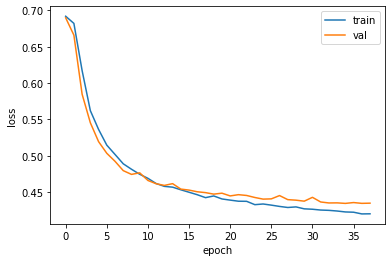

In [13]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

In [14]:
## GRU structure

model4 = keras.Sequential()
model4.add(keras.layers.Embedding(500, 16, input_length=100))
model4.add(keras.layers.GRU(8))
model4.add(keras.layers.Dense(1, activation='sigmoid'))

In [15]:
model4.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 100, 16)           8000      
_________________________________________________________________
gru (GRU)                    (None, 8)                 624       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 9         
Total params: 8,633
Trainable params: 8,633
Non-trainable params: 0
_________________________________________________________________


In [16]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model4.compile(optimizer=rmsprop, loss='binary_crossentropy',
               metrics=['accuracy'])
checkpint_cb = keras.callbacks.ModelCheckpoint('best-gru-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,
                                                  restore_best_weights=True)
history = model4.fit(train_seq, train_target, epochs=100, batch_size=64,
                     validation_data=(val_seq, val_target),
                     callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 9s 21ms/step - loss: 0.6922 - accuracy: 0.5317 - val_loss: 0.6917 - val_accuracy: 0.5460
Epoch 2/100
313/313 [==============================] - 6s 20ms/step - loss: 0.6901 - accuracy: 0.5821 - val_loss: 0.6894 - val_accuracy: 0.5854
Epoch 3/100
313/313 [==============================] - 6s 20ms/step - loss: 0.6868 - accuracy: 0.6122 - val_loss: 0.6857 - val_accuracy: 0.6002
Epoch 4/100
313/313 [==============================] - 6s 20ms/step - loss: 0.6817 - accuracy: 0.6241 - val_loss: 0.6801 - val_accuracy: 0.6088
Epoch 5/100
313/313 [==============================] - 6s 20ms/step - loss: 0.6736 - accuracy: 0.6335 - val_loss: 0.6712 - val_accuracy: 0.6206
Epoch 6/100
313/313 [==============================] - 6s 20ms/step - loss: 0.6611 - accuracy: 0.6481 - val_loss: 0.6569 - val_accuracy: 0.6392
Epoch 7/100
313/313 [==============================] - 6s 20ms/step - loss: 0.6408 - accuracy: 0.6653 - val_loss: 0.6329 - val_accuracy:

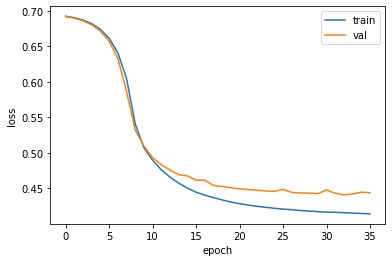

In [17]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

In [18]:
test_seq = pad_sequences(test_input, maxlen=100)
rnn_model = keras.models.load_model('best-2rnn-model.h5')
rnn_model.evaluate(test_seq, test_target)

782/782 [==============================] - 6s 8ms/step - loss: 0.4393 - accuracy: 0.7973


[0.43929362297058105, 0.7972800135612488]

## The entire code for this chapter is below